**Exercise 6.31**. Simulate a nonstationary time series with $n = 60$ according to the model ARIMA(0,1,1) with $\theta = 0.8$. 

**(a)** Perform the (augmented) Dickey-Fuller test on the series with $k = 0$ in Equation (6.4.1) on page 128. (With $k = 0$, this is the Dickey-Fuller test and is not augmented.) Comment on the results. 

**(b)** Perform the augmented Dickey-Fuller test on the series with $k$ chosen by the software—that is, the “best” value for $k$. Comment on the results. 

**(c)** Repeat parts (a) and (b) but use the differences of the simulated series. Comment on the results. (Here, of course, you should reject the unit root hypothesis.) 

**Solution**.

The conclusions for this exercise are more intuitive if we instead use $\theta = -0.8$.  We will solve with the original value of $\theta = 0.8$, obtain insatisfactory conclusions, and then repeat the exercise with $\theta = -0.8$.

In [1]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

In [2]:
def generate_arima(phi=[], d=0, theta=[], n=100):
    ar = np.r_[1, -np.array(phi)]
    ma = np.r_[1, -np.array(theta)]
    Y = ArmaProcess(ar, ma).generate_sample(nsample=n)
    for i in range(d):
        Y = np.cumsum(Y)
    return Y

In [3]:
np.random.seed(0)
Y = generate_arima(d=1, theta=[0.8], n=60)

Observe the series is not obviously nonstationary by visual inspection:

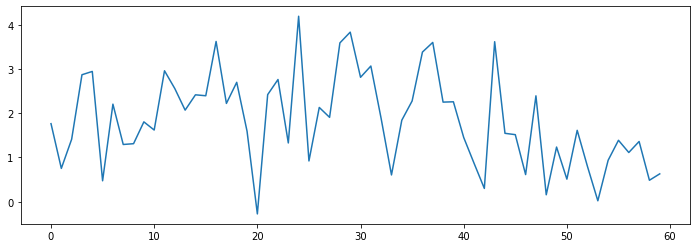

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.show()

**(a)**

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
result = adfuller(Y, maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %e' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -5.805661
p-value: 4.522909e-07
Used lags: 0
Critical Values:
  1%: -3.546
  5%: -2.912
  10%: -2.594


The Dick-Fuller test does reject nonstationarity (unit root).  This disagrees with the series being nonstationary.

**(b)**

In [7]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %.5f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -3.716922
p-value: 0.00388
Used lags: 1
Critical Values:
  1%: -3.548
  5%: -2.913
  10%: -2.594


The Augmented Dick-Fuller test still rejects nonstationarity.

**(c)**

In [8]:
result = adfuller(np.diff(Y), maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %e' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -7.838325
p-value: 6.030793e-12
Used lags: 1
Critical Values:
  1%: -3.551
  5%: -2.914
  10%: -2.595


In [9]:
result = adfuller(np.diff(Y))
print('ADF Statistic: %f' % result[0])
print('p-value: %e' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -5.969041
p-value: 1.956131e-07
Used lags: 5
Critical Values:
  1%: -3.560
  5%: -2.918
  10%: -2.597


Both the Dick-Fuller nor the Augmented Dick-Fuller tests reject nonstationarity on the time series difference (now in agreement with the model.)

Now, repeating the exercise with $\theta = -0.8$:

In [10]:
np.random.seed(0)
Y = generate_arima(d=1, theta=[-0.8], n=60)

The series is more obviously non-stationary, visually:

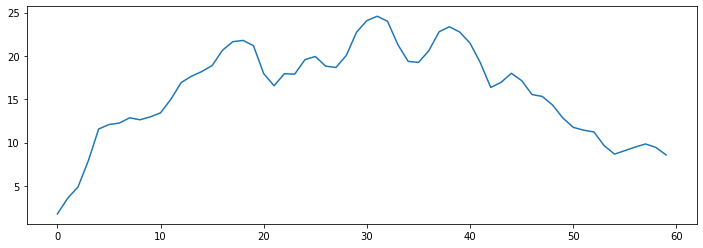

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.show()

In [12]:
result = adfuller(Y, maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -2.187538
p-value: 0.211
Used lags: 1
Critical Values:
  1%: -3.548
  5%: -2.913
  10%: -2.594


Now the Dick-Fuller test correctly does not reject stationarity (p-value over 0.05).

In [13]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -0.948111
p-value: 0.772
Used lags: 7
Critical Values:
  1%: -3.563
  5%: -2.919
  10%: -2.597


Augmented Dick-Fuller also does not reject non-stationarity.

In [14]:
result = adfuller(np.diff(Y), maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %e' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -4.802493
p-value: 5.379182e-05
Used lags: 1
Critical Values:
  1%: -3.551
  5%: -2.914
  10%: -2.595


In [15]:
result = adfuller(np.diff(Y))
print('ADF Statistic: %f' % result[0])
print('p-value: %e' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -4.802493
p-value: 5.379182e-05
Used lags: 1
Critical Values:
  1%: -3.551
  5%: -2.914
  10%: -2.595


For the series of differences, both the Dick-Fuller and the Augmented Dick-Fuller tests reject nonstationarity (correctly).

**Exercise 6.32**. Simulate a stationary time series of length $n = 36$ according to an AR(1) model with $\phi = 0.95$. This model is stationary, but just barely so. With such a series and a short history, it will be difficult if not impossible to distinguish between stationary and nonstationary with a unit root.

**(a)** Plot the series and calculate the sample ACF and PACF and describe what you see.

**(b)** Perform the (augmented) Dickey-Fuller test on the series with $k = 0$ in Equation (6.4.1) on page 128. (With $k = 0$ this is the Dickey-Fuller test and is not augmented.) Comment on the results.

**(c)** Perform the augmented Dickey-Fuller test on the series with $k$ chosen by the software—that is, the “best” value for $k$. Comment on the results.

**(d)** Repeat parts (a), (b), and (c) but with a new simulation with $n = 100$.

**Solution**.

In [16]:
np.random.seed(0)
Y = generate_arima(phi=[0.95], n=36)

**(a)**

In [17]:
from statsmodels.tsa.stattools import acf, pacf

# Function to plot provided autocorrelations
def plot_acf(acf, title='ACF'):
    max_k = len(acf)
    k = range(1, len(acf)+1)
    
    plt.figure(figsize=(12, 4))
    plt.plot(k, acf, marker='o', linestyle='none', color='C0')
    plt.plot([1, max_k], [0, 0], ls=':', color='C0')
    for i_k, i_rho in zip(k, acf):
        plt.plot([i_k, i_k], [0, i_rho], color='C0')
    
    plt.xlabel('Lag')
    plt.ylabel(r'$\rho_k$')
    plt.title(title)
    plt.show()
    
def plot_acf_with_bounds(acf, lower, upper, title='ACF'):
    max_k = len(acf)
    k = range(1, len(acf)+1)
    
    plt.figure(figsize=(12, 4))
    plt.fill_between(k, lower, upper, color='C0', alpha=0.2)

    plt.plot(k, acf, marker='o', linestyle='none', color='C0')
    plt.plot([1, max_k], [0, 0], ls=':', color='C0')
    for i_k, i_rho in zip(k, acf):
        plt.plot([i_k, i_k], [0, i_rho], color='C0')    
    
    plt.xlabel('Lag')
    plt.ylabel(r'$\rho_k$')
    plt.title(title)
    plt.show()

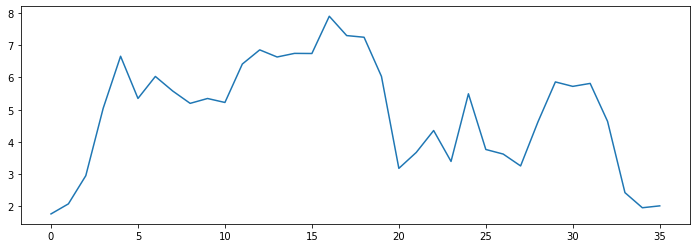

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.show()

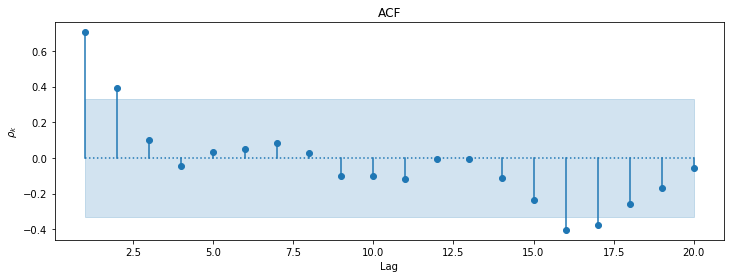

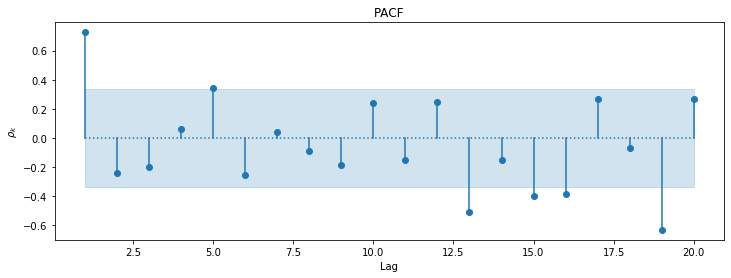

In [19]:
bound = 2 / np.sqrt(len(Y))
plot_acf_with_bounds(acf(Y, fft=False, nlags=20)[1:], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, nlags=20)[1:], bound, -bound, title='PACF')

The PACF suggests an AR(1) model, but the series is not obviously stationary from the timeseries.

**(b)**

In [20]:
result = adfuller(Y, maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -2.128863
p-value: 0.233
Used lags: 0
Critical Values:
  1%: -3.633
  5%: -2.949
  10%: -2.613


The Dick-Fuller test fails to reject nonstationarity.

**(c)**

In [21]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -2.128863
p-value: 0.233
Used lags: 0
Critical Values:
  1%: -3.633
  5%: -2.949
  10%: -2.613


The Augmented Dick-Fuller method also fails to reject nonstationarity.

**(d)**

In [22]:
np.random.seed(0)
Y = generate_arima(phi=[0.95], n=100)

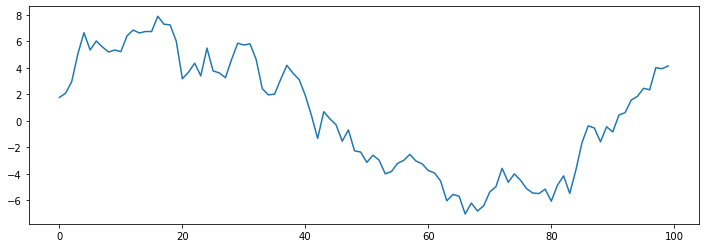

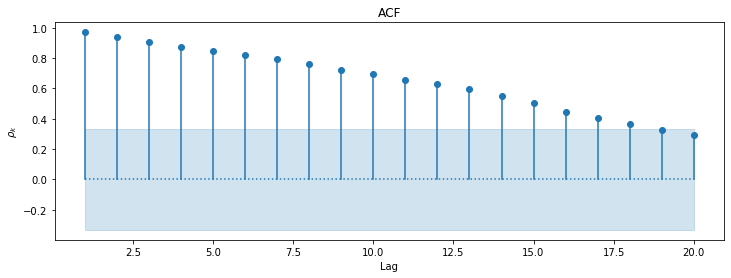

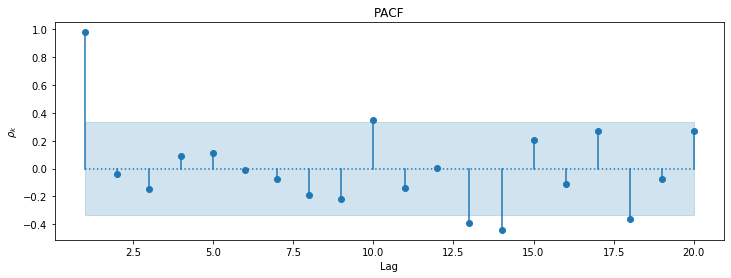

In [23]:
plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.show()

plot_acf_with_bounds(acf(Y, fft=False, nlags=20)[1:], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, nlags=20)[1:], bound, -bound, title='PACF')

The series looks more obviously AR(1) now.

In [24]:
result = adfuller(Y, maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -0.992485
p-value: 0.756
Used lags: 0
Critical Values:
  1%: -3.498
  5%: -2.891
  10%: -2.583


In [25]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -0.992485
p-value: 0.756
Used lags: 0
Critical Values:
  1%: -3.498
  5%: -2.891
  10%: -2.583


p-values are even higher on not rejecting nonstationarity now.

**Exercise 6.33**. The data file named `deere1` contains 82 consecutive values for the amount of deviation (in 0.000025 inch units) from a specified target value that an industrial machining process at Deere & Co. produced under certain specified operating conditions.

**(a)** Display the time series plot of this series and comment on any unusual points.

**(b)** Calculate the sample ACF for this series and comment on the results.

**(c)** Now replace the unusual value by a much more typical value and recalculate the sample ACF. Comment on the change from what you saw in part (b).

**(d)** Calculate the sample PACF based on the revised series that you used in part (c). What model would you specify for the revised series? (Later we will investigate other ways to handle outliers in time series modeling.)

**Solution**.

In [26]:
import pandas as pd

Y = pd.read_csv('../data/deere1.dat')['deere1']

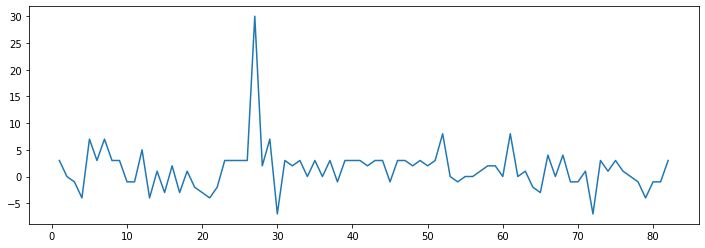

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(Y) + 1), Y)
plt.show()

The point at $t = 27$ with value 30 seems like an outlier; otherwise the series seems stationary.

**(b)**

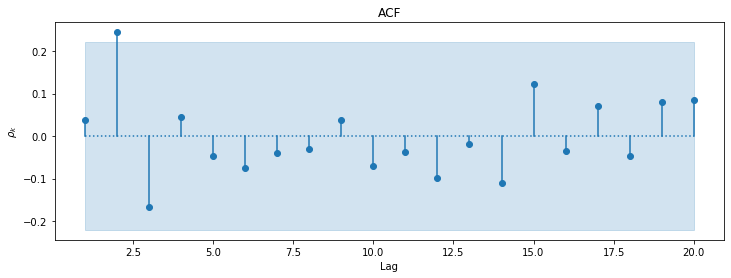

In [28]:
bound = 2 / np.sqrt(len(Y))
plot_acf_with_bounds(acf(Y, fft=False, nlags=20)[1:], bound, -bound, title='ACF')

It looks like there is a significant autocorrelation at lag 2.

**(c)**

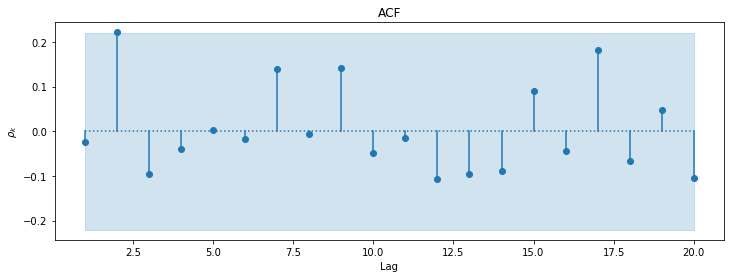

In [29]:
Y[26] = 1
plot_acf_with_bounds(acf(Y, fft=False, nlags=20)[1:], bound, -bound, title='ACF')

This doesn't seem to have had a large impact on the sample ACF for lag 2.

**(d)**

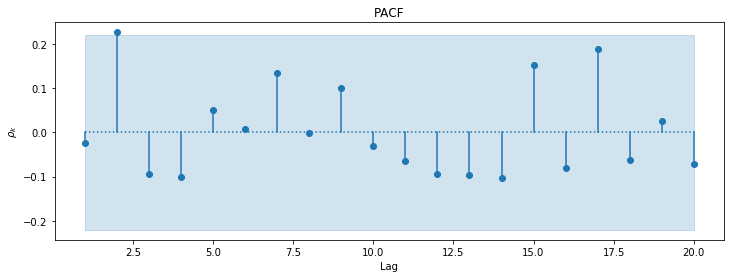

In [30]:
plot_acf_with_bounds(pacf(Y, nlags=20)[1:], bound, -bound, title='PACF')

This suggests an AR(2) model.

**Exercise 6.34**. The data file named `deere2` contains 102 consecutive values for the amount of deviation (in 0.0000025 inch units) from a specified target value that another industrial machining process produced at Deere & Co.

**(a)** Display the time series plot of this series and comment on its appearance. Would a stationary model seem to be appropriate?

**(b)** Display the sample ACF and PACF for this series and select tentative orders for an ARMA model for the series.

**Solution**.

In [31]:
Y = pd.read_csv('../data/deere2.dat')['deere2']

**(a)**

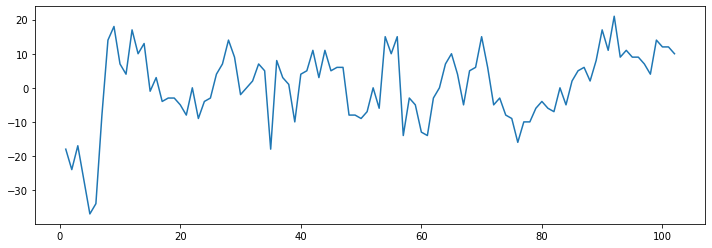

In [32]:
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(Y) + 1), Y)
plt.show()

This series could be stationary.  Let's do the ADF test to get a better sense:

In [33]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %.5f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -4.099162
p-value: 0.00097
Used lags: 1
Critical Values:
  1%: -3.498
  5%: -2.891
  10%: -2.582


ADF rejects nonstationarity, agreeing with the intuition above.

**(b)**

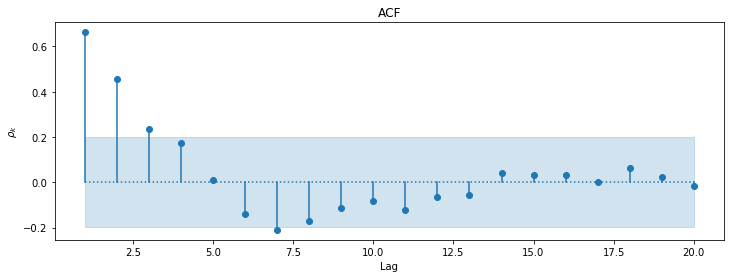

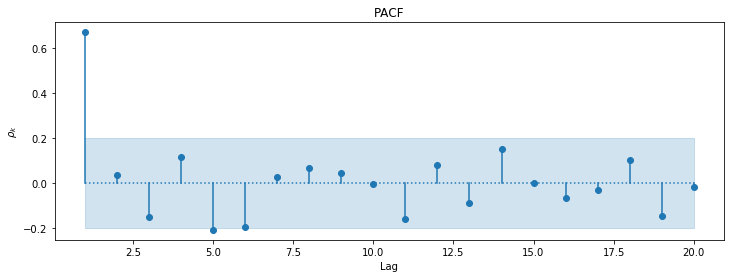

In [34]:
bound = 2 / np.sqrt(len(Y))
plot_acf_with_bounds(acf(Y, fft=False, nlags=20)[1:], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, nlags=20)[1:], bound, -bound, title='PACF')

An AR(1) model might be a good fit.  Let's look at EACF too (since we coded it in Python after all):

In [35]:
%%capture
%run eacf.py

In [36]:
eacf(Y, ar_max=13, ma_max=13);

AR / MA
    0  1  2  3  4  5  6  7  8  9 10 11 12 13
0   x  x  x  o  o  o  x  o  o  o  o  o  o  o
1   o  o  x  o  o  o  o  o  o  o  o  o  o  o
2   x  o  o  x  o  o  o  o  o  o  o  o  o  o
3   x  o  o  x  o  o  o  o  o  o  o  o  o  o
4   x  o  x  x  o  o  o  o  o  o  o  o  o  o
5   x  x  o  o  o  o  o  o  o  o  o  o  o  o
6   o  o  x  o  o  o  o  o  o  o  o  o  o  o
7   x  o  o  o  o  o  o  o  o  o  o  o  o  o
8   x  x  o  o  o  o  o  o  o  o  o  o  o  o
9   x  o  o  o  o  o  o  o  o  o  o  o  o  o
10  x  x  x  o  o  o  o  o  o  o  o  o  o  o
11  x  o  x  o  o  x  o  o  o  o  o  o  o  o
12  x  o  x  o  x  o  o  o  o  o  o  o  o  o
13  x  x  x  x  x  o  o  o  o  o  o  o  o  o


EACF also appears to suggest an AR(1) model.

**Exercise 6.35**. The data file named deere3 contains 57 consecutive measurements recorded from a complex machine tool at Deere & Co. The values given are deviations from a target value in units of ten millionths of an inch. The process employs a control mechanism that resets some of the parameters of the machine tool depending on the magnitude of deviation from target of the last item produced.

**(a)** Display the time series plot of this series and comment on its appearance.  Would a stationary model be appropriate here?

**(b)** Display the sample ACF and PACF for this series and select tentative orders for an ARMA model for the series.

**Solution**.

In [37]:
Y = pd.read_csv('../data/deere3.dat')['deere3']

**(a)**

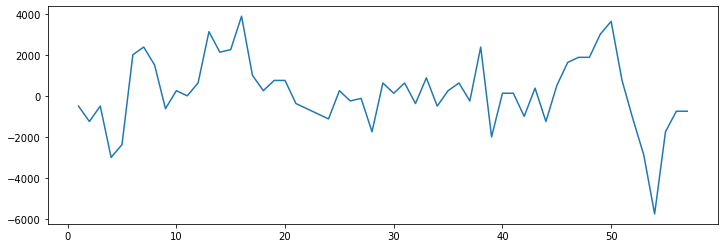

In [38]:
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(Y) + 1), Y)
plt.show()

This series still seems to be stationary -- though the intuition is also partly driven by the fact that this is a process mediated by a control mechanism, rather than just plain measurement error.  Let's look at the ADF test:

In [39]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %.5f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -4.118438
p-value: 0.00090
Used lags: 3
Critical Values:
  1%: -3.560
  5%: -2.918
  10%: -2.597


The ADF test rejects nonstationarity.

**(b)** 

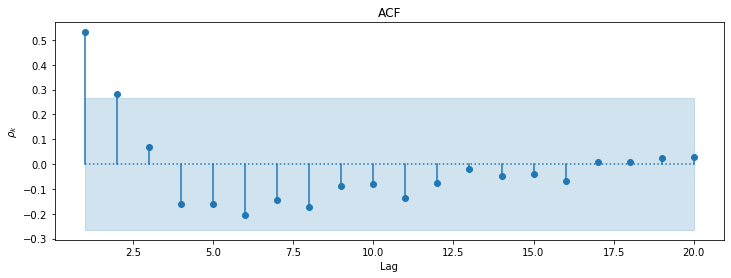

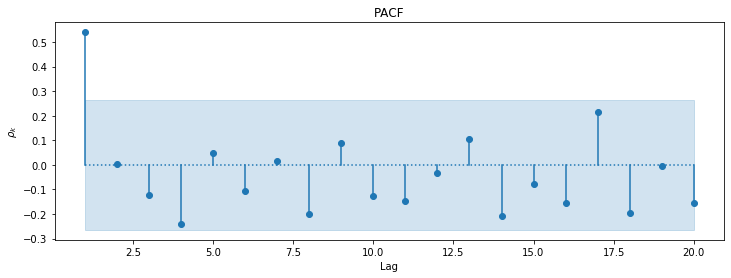

In [40]:
bound = 2 / np.sqrt(len(Y))
plot_acf_with_bounds(acf(Y, fft=False, nlags=20)[1:], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, nlags=20)[1:], bound, -bound, title='PACF')

Once again, an AR(1) model seems reasonable from the PACF.  Let's also look at the EACF:

In [41]:
eacf(Y, ar_max=13, ma_max=13);

AR / MA
    0  1  2  3  4  5  6  7  8  9 10 11 12 13
0   x  x  o  o  o  o  o  o  o  o  o  o  o  o
1   o  o  o  o  o  o  o  o  o  o  o  o  o  o
2   o  o  o  o  o  o  o  o  o  o  o  o  o  o
3   x  o  o  o  o  o  o  o  o  o  o  o  o  o
4   o  x  o  o  o  o  o  o  o  o  o  o  o  o
5   o  x  o  x  o  o  o  o  o  o  o  o  o  o
6   o  x  o  x  o  o  o  o  o  o  o  o  o  o
7   o  x  x  o  o  o  o  o  o  o  o  o  o  o
8   x  o  o  o  o  o  o  o  o  o  o  o  o  o
9   x  o  x  o  o  o  o  o  o  o  o  o  o  o
10  x  x  o  o  o  o  o  o  o  o  o  o  o  o
11  o  x  o  o  o  o  o  o  o  o  o  o  o  o
12  x  o  o  o  o  o  o  o  o  o  o  o  o  o
13  x  o  o  o  o  o  o  o  o  o  o  o  o  o


EACF also appears to suggest an AR(1) model.

**Exercise 6.36**. The data file named `robot` contains a time series obtained from an industrial robot.  The robot was put through a sequence of maneuvers, and the distance from a desired ending point was recorded in inches. This was repeated 324 times to form the time series.

**(a)** Display the time series plot of the data. Based on this information, do these data appear to come from a stationary or nonstationary process?

**(b)** Calculate and plot the sample ACF and PACF for these data. Based on this additional information, do these data appear to come from a stationary or nonstationary process?

**(c)** Calculate and interpret the sample EACF.

**(d)** Use the best subsets ARMA approach to specify a model for these data. Compare these results with what you discovered in parts (a), (b), and (c).

**Solution**.

In [42]:
Y = pd.read_csv('../data/robot.dat')['robot']

**(a)**

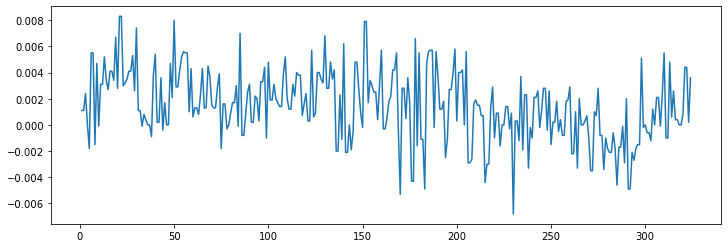

In [43]:
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(Y) + 1), Y)
plt.show()

This series does appear stationary, though there is perhaps some "drift" in the later half. Let's look at the ADF:

In [44]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %.5f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -2.881064
p-value: 0.04759
Used lags: 11
Critical Values:
  1%: -3.451
  5%: -2.871
  10%: -2.572


ADF does test rejects nonstationarity at p-value under 0.05. Perhaps the series is stationary.

**(b)**

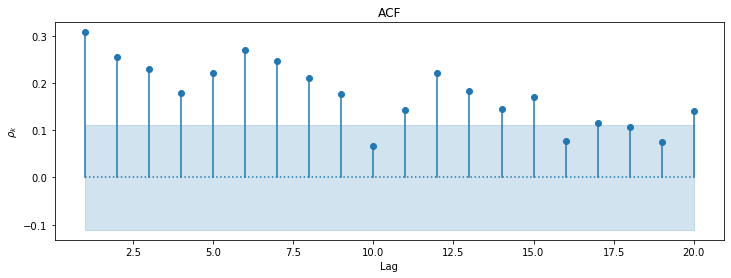

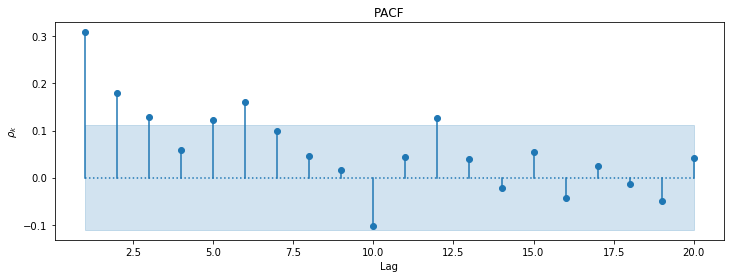

In [45]:
bound = 2 / np.sqrt(len(Y))
plot_acf_with_bounds(acf(Y, fft=False, nlags=20)[1:], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, nlags=20)[1:], bound, -bound, title='PACF')

The PACF plot suggests an AR(3) model for the series.

**(c)**

In [46]:
eacf(Y);

AR / MA
   0  1  2  3  4  5  6  7  8  9 10 11 12 13
0  x  x  x  x  x  x  x  x  x  o  x  x  x  x
1  x  o  o  o  o  o  o  o  o  o  o  o  o  o
2  x  x  o  o  o  o  o  o  o  o  o  o  o  o
3  x  x  o  o  o  o  o  o  o  o  o  o  o  o
4  x  x  x  x  o  o  o  o  o  o  o  o  x  o
5  x  x  x  o  o  o  o  o  o  o  o  o  x  o
6  x  o  o  o  o  x  o  o  o  o  o  o  o  o
7  x  o  o  x  o  x  x  o  o  o  o  o  o  o


The EACF suggests an ARMA(1, 1) process for the series.

**(d)**

In [47]:
%%capture
%run armasubsets.py

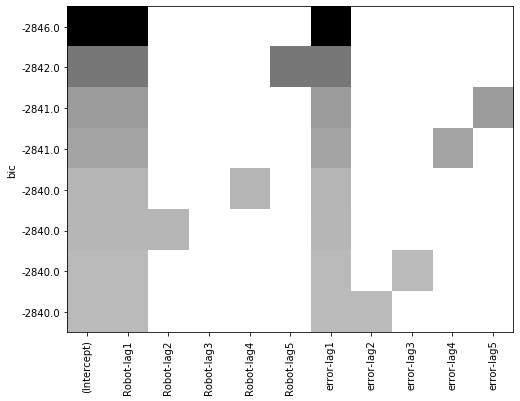

In [48]:
armasubsets(y=Y, nar=5, nma=5, y_name='Robot');

The best subsets approach also suggests an ARMA(1, 1) model (looking at the darker cells in the topmost row / with best BIC).

**Exercise 6.37**. Calculate and interpret the sample EACF for the logarithms of the Los Angeles rainfall series.  The data are in the file named `larain`.  Do the results confirm that the  logs are white noise?

**Solution**.

In [49]:
data = pd.read_csv('../data/larain.dat')
data['date'] = pd.date_range('1878', periods=len(data), freq='Y')
data['t'] = data['date'].dt.year

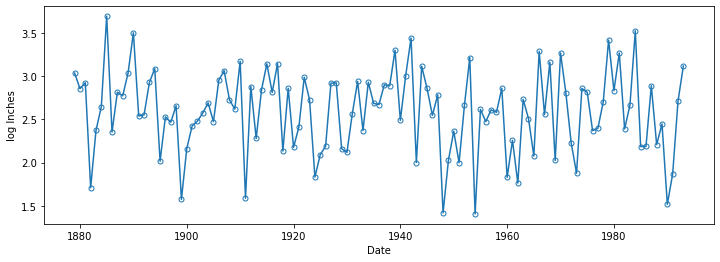

In [50]:
plt.figure(figsize=(12, 4))
plt.plot(data['date'], np.log(data['larain']), marker='o', markerfacecolor='none', ls='solid', ms=5)
plt.ylabel('log Inches')
plt.xlabel('Date')
plt.show()

In [51]:
Y = np.log(data['larain'])
eacf(Y);

AR / MA
   0  1  2  3  4  5  6  7  8  9 10 11 12 13
0  o  o  o  o  o  o  o  o  o  o  o  o  o  o
1  o  o  o  o  o  o  o  o  o  o  o  o  o  o
2  x  x  o  o  o  o  o  o  o  o  o  o  o  o
3  x  o  o  o  o  o  o  o  o  o  o  o  o  o
4  x  o  o  o  o  o  o  o  o  o  o  o  o  o
5  x  x  x  x  x  o  o  o  o  o  o  o  o  o
6  x  x  o  o  x  o  o  o  o  o  o  o  o  o
7  x  o  x  o  o  o  o  o  o  o  o  o  o  o


Yes -- EACF suggests this is a white noise process.

**Exercise 6.38**.  Calculate and interpret the sample EACF for the color property time series. The data are in the `color` file. Does the sample EACF suggest the same model that was specified by looking at the sample PACF?

**Solution**.

In [52]:
data = pd.read_csv('../data/color.dat')
data['t'] = np.arange(1, data.shape[0] + 1)

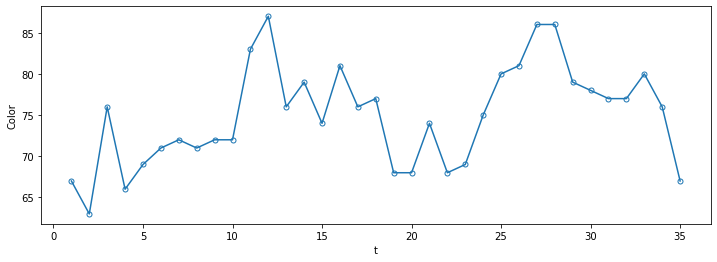

In [53]:
plt.figure(figsize=(12, 4))
plt.plot(data['t'], data['color'], marker='o', markerfacecolor='none', ls='solid', ms=5)
plt.ylabel('Color')
plt.xlabel('t')
plt.show()

In [54]:
Y = data['color']
eacf(Y, ar_max=5, ma_max=5);

AR / MA
   0  1  2  3  4  5
0  x  o  o  o  o  o
1  o  o  o  o  o  o
2  o  o  o  o  o  o
3  x  o  o  o  o  o
4  o  o  o  o  o  o
5  x  o  o  o  o  o


No -- EACF suggests an AR(1) or a MA(1) model.

**Exercise 6.39**.  The data file named `days` contains accounting data from the Winegard Co. of Burlington, Iowa. The data are the number of days until Winegard receives payment for 130 consecutive orders from a particular distributor of Winegard products. (The name of the distributor must remain anonymous for confidentiality reasons.)

**(a)** Plot the time series, and comment on the display. Are there any unusual values?

**(b)** Calculate the sample ACF and PACF for this series.

**(c)** Now replace each of the unusual values with a value of 35 days -- much more typical values -- and repeat the calculation of the sample ACF and PACF.  What ARMA model would you specify for this series after removing the outliers? (Later we will investigate other ways to handle outliers in time series modeling.)

**Solution**.

**(a)**

In [55]:
data = pd.read_csv('../data/days.dat')
data['t'] = np.arange(1, data.shape[0] + 1)

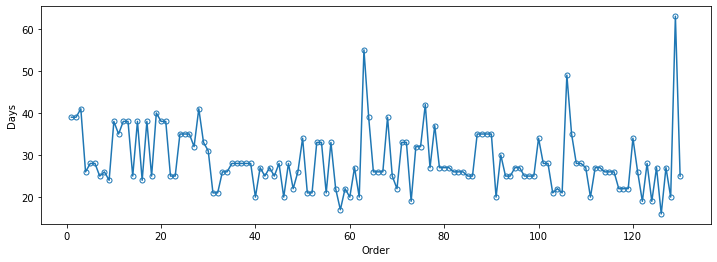

In [56]:
plt.figure(figsize=(12, 4))
plt.plot(data['t'], data['days'], marker='o', markerfacecolor='none', ls='solid', ms=5)
plt.ylabel('Days')
plt.xlabel('Order')
plt.show()

There seem to be outlier values at positions 63, 106, and 109.

**(b)**

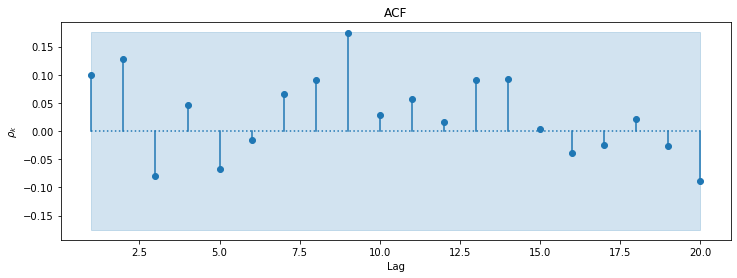

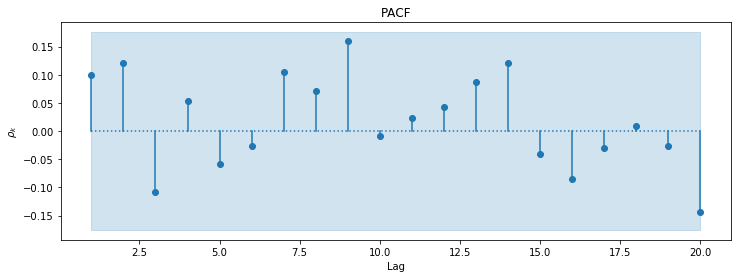

In [57]:
Y = data['days'].copy()

bound = 2 / np.sqrt(len(Y))
plot_acf_with_bounds(acf(Y, fft=False, nlags=20)[1:], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, nlags=20)[1:], bound, -bound, title='PACF')

Looks like white noise.

**(c)**

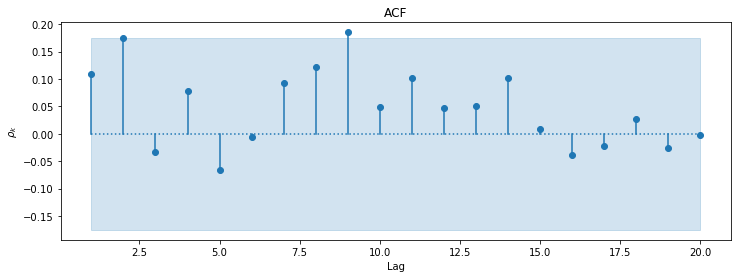

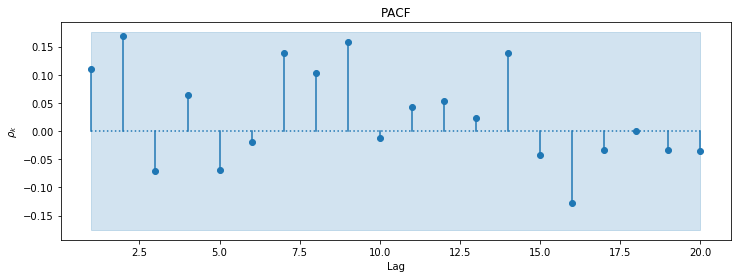

In [58]:
Y[62] = 35
Y[105] = 35
Y[108] = 35

bound = 2 / np.sqrt(len(Y))
plot_acf_with_bounds(acf(Y, fft=False, nlags=20)[1:], bound, -bound, title='ACF')
plot_acf_with_bounds(pacf(Y, nlags=20)[1:], bound, -bound, title='PACF')

It still looks like white noise, though we may want to investigate AR(2) and MA(2).